In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats 
from scipy.stats import zscore
from scipy import stats 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve, roc_auc_score, r2_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [6]:
#There is no null values in data

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
(df["radio"]==0).value_counts()

False    199
True       1
Name: radio, dtype: int64

In [9]:
df.loc[df["radio"]==0]

,Unnamed: 0,TV,radio,newspaper,sales
127,128,80.2,0.0,9.2,8.8


In [10]:
#Exploratory Analysis

In [11]:
corr=df.corr()

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000


<AxesSubplot:>

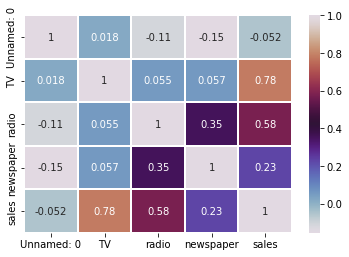

In [12]:
print(corr)
sns.heatmap(corr, cmap="twilight", annot=True, linewidth=0.3)

In [13]:
#It can be noticed Sales is highly correlated with TV advertisments and there is a very less effect of newspaper ads on Sales

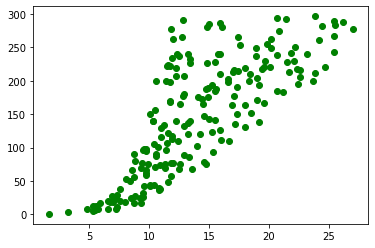

In [14]:
plt.scatter(x = 'sales', y = 'TV', data = df,c='g')

In [15]:
#We can see count of 25 TV ads sales going upto 300

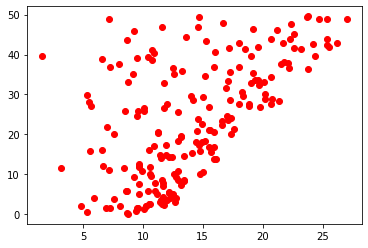

In [16]:
plt.scatter(x = 'sales', y = 'radio', data = df,c='r')

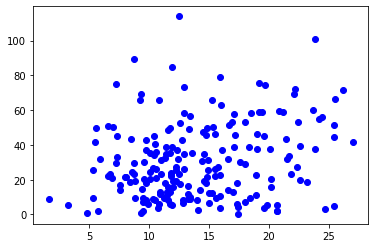

In [17]:
plt.scatter(x = 'sales', y = 'newspaper', data = df,c='b')

In [18]:
#If we focus on TV Advertisement more we can get more sales

In [19]:
#Checking outliers

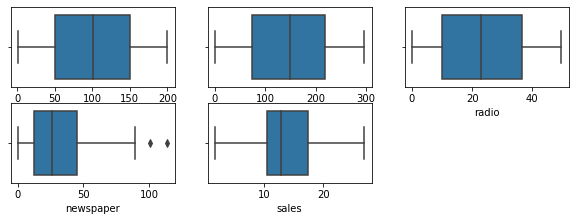

In [20]:
plt.figure(figsize=(10,5))
for o in enumerate(df):
    plt.subplot(3,3,o[0]+1)
    sns.boxplot(df[o[1]])

In [21]:
#We are having outliers in "newspaper" column

In [22]:
#Removal of outliers

In [23]:
#ZSCORE METHOD

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [24]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (200, 5)
After removing outliers:: (198, 5)


In [25]:
#IQR METHOD
IQR = stats.iqr(df) 
IQR 

76.22500000000001

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [27]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(200, 5)


In [28]:
#Using IQR method for outliers removal there is huge data loss so considering ZSCORE METHOD

In [29]:
df=df_1

In [30]:
df.shape

(198, 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x23e8da8e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23e8da8e9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e8da8e040>],
 'medians': [<matplotlib.lines.Line2D at 0x23e8da9b130>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e8da9b4c0>],
 'means': []}

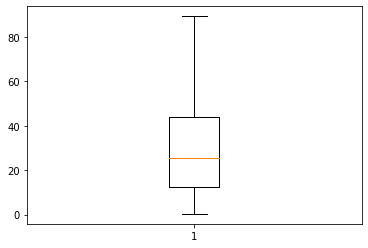

In [31]:
plt.boxplot(df['newspaper'])

In [32]:
# Checking for skewness

In [33]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper     0.650112
sales         0.407130
dtype: float64

In [34]:
#There is skewness in newspaper columns

In [35]:
#Removing Skewness
df['newspaper']=np.sqrt(df['newspaper'])

In [36]:
df.skew()

Unnamed: 0   -0.006283
TV           -0.082332
radio         0.114842
newspaper    -0.040649
sales         0.407130
dtype: float64

In [37]:
x=df.drop(['sales'],axis=1)
y=df['sales']

In [38]:
print(x.shape)
print(y.shape)

(198, 4)
(198,)


In [39]:
#Scalling the data

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [40]:
pd.DataFrame(x).describe()

,0,1,2,3
count,198.000000,198.000000,198.000000,198.000000
mean,0.502081,0.498424,0.466347,0.509620
std,0.290782,0.291715,0.299639,0.222222
min,0.000000,0.000000,0.000000,0.000000
25%,0.252513,0.252987,0.200101,0.337801
50%,0.500000,0.508877,0.451613,0.506534
75%,0.752513,0.743513,0.732359,0.683610
max,1.000000,1.000000,1.000000,1.000000


In [41]:
x.shape

(198, 4)

In [42]:
#Model Building

In [43]:
#Linear Regression

LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.8902201116288775
At random state 0, The test accuracy is: 0.909118691180519


At random state 1, The training accuracy is: 0.8946233462304936
At random state 1, The test accuracy is: 0.8899109208460371


At random state 2, The training accuracy is: 0.91068263839584
At random state 2, The test accuracy is: 0.8362279699320538


At random state 3, The training accuracy is: 0.8948889012285308
At random state 3, The test accuracy is: 0.8953602303589753


At random state 4, The training accuracy is: 0.8980854079958381
At random state 4, The test accuracy is: 0.8723874483009664


At random state 5, The training accuracy is: 0.8994329682403984
At random state 5, The test accuracy is: 0.8616441304474729


At random state 6, The training accuracy is: 0.899322882220005
At random state 6, The test accuracy is: 0.8761321856329721


At random state 7, The training accuracy is: 0.8913924455946647
At random state 7, The test accuracy is: 0.904279625141414

In [44]:
#Random state=10 giving highest accuracy, choosing that as random state

In [45]:
# Splitting the data with random state = 10

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=10)

In [47]:
x_train.shape

(144, 4)

In [48]:
x_test.shape

(54, 4)

In [49]:
y_train.shape

(144,)

In [50]:
y_test.shape

(54,)

In [51]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.9246705464811432


In [52]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 5.310793035584608
MAE: 1.6644290440468552
r2_score: 0.7765274477578298


In [53]:
#Ridge Regression 
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.9197312993458817


In [54]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 5.558997017289492
MAE: 1.686502382904216
r2_score: 0.7260373532726067


In [55]:
#SVR Regression
#SVR(kernel='linear')

svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.9022731289447546


In [56]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 6.427839337819514
MAE: 1.7248222663333233
r2_score: 0.6227127014322855


In [57]:
#SVR(kernel='poly')
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.9287870676282131


In [58]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 3.590884198588239
MAE: 1.3035907167919714
r2_score: 0.8606104342078341


In [59]:
#(kernel='rbf')
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.9050408270385731


In [60]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 5.857182575629431
MAE: 1.466963946739548
r2_score: 0.5574454792495185


In [61]:
#RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9968584433352197


In [62]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.7234174259259253
MAE: 0.5944629629629635
r2_score: 0.9695814118120224


In [63]:
#DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [64]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 1.6670370370370373
MAE: 0.8703703703703703
r2_score: 0.9326266431254181


In [65]:
#GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.999303725458487


In [66]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.824922677904734
MAE: 0.5925862531785943
r2_score: 0.9667105540824006


In [67]:
#Cross validation

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 3.132736, 1.804401
R    : 3.187969, 1.909816
svr    : 3.728657, 2.451061
svr_p    : 3.084163, 1.338012
svr_r    : 3.832606, 2.762439
RF    : 0.602945, 0.164691
DTR    : 1.430997, 0.565684
GBR    : 0.546409, 0.265686


In [68]:
#Selecting the RandomForestRegressor & GradientBoostingRegressoras for GridSeachCV

In [69]:
#HYPER PARAMETER TUNING: GridSearchCV

In [70]:
#RandomForestRegressor

RF=RandomForestRegressor()
param={
     'criterion':['mse','mae'],
    'n_estimators':[100, 200],
    'max_depth':[1],
   'max_features' : ["sqrt", "log2",],
}

In [71]:
RF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [72]:
RF_grid.fit(x_train,y_train)
RF_grid_pred=RF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [73]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [74]:
print('MSE:',mean_squared_error(RF_grid_pred,y_test))
print('MAE:',mean_absolute_error(RF_grid_pred,y_test))
print('r2_score:',r2_score(RF_grid_pred,y_test))

MSE: 17.111898248877452
MAE: 3.1619522947008867
r2_score: -4.113654975734652


<AxesSubplot:xlabel='sales', ylabel='Density'>

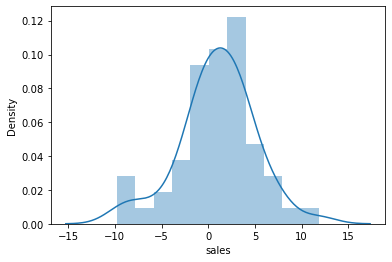

In [75]:
sns.distplot(RF_grid_pred-y_test)

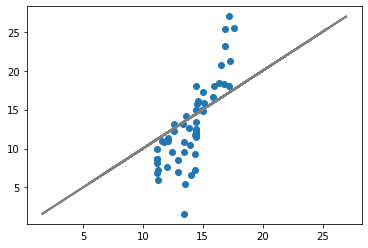

In [76]:
plt.scatter(RF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='grey')

In [77]:
#GradientBoostingRegressor

GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [78]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [79]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [80]:
RF_grid.best_params_

{'criterion': 'mse',
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [81]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.7595865740740726
MAE: 0.608166666666667
r2_score: 0.9682841212464558


<AxesSubplot:xlabel='sales', ylabel='Density'>

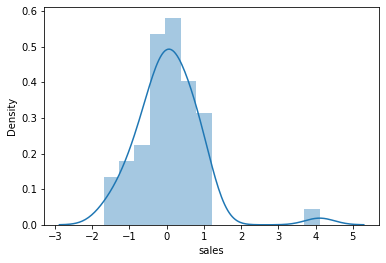

In [82]:
sns.distplot(GF_grid_pred-y_test)

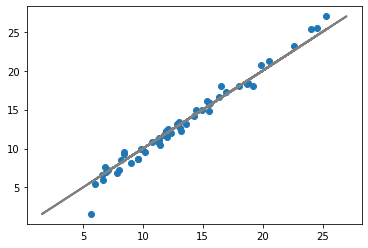

In [83]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='grey')

In [84]:
#Choosing GradientBoostingRegressor as the best model

In [85]:
import joblib
joblib.dump(RF_grid.best_estimator_,'Advertising Sales Channel Prediction_Project.obj')

['Advertising Sales Channel Prediction_Project.obj']